## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('B500Kflight.csv',parse_dates= ['fl_date'],encoding='utf-8-sig'
            )   
#data['Month'] = data['Date'].dt.month,data['Day'] = data['Date'].dt.day)
test=data.copy()

In [3]:
test['fl_date'].dtype

dtype('<M8[ns]')

In [4]:
test2=test.copy()
# Check NaN values
# missing data
total = test2.isnull().sum().sort_values(ascending=False)
percent = (test2.isnull().sum()/test2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data

missing_data


,Total,Percent
no_name,500000,1.000000
total_add_gtime,496460,0.992920
first_dep_time,496460,0.992920
longest_add_gtime,496460,0.992920
cancellation_code,490247,0.980494
late_aircraft_delay,405523,0.811046
security_delay,405523,0.811046
nas_delay,405523,0.811046
weather_delay,405523,0.811046
carrier_delay,405523,0.811046


In [5]:

#Remove null values associated with arrival and departure delays
to_drop = ['arr_delay','dep_delay']
test2 = test2.dropna(axis=0,how='any',subset = to_drop)

#Fill remaining null values with 0 to indicate no delay in respective area
test2["late_aircraft_delay"] = test2["late_aircraft_delay"].fillna(0)
test2["security_delay"] = test2["security_delay"].fillna(0)
test2["nas_delay"] = test2["nas_delay"].fillna(0)
test2["weather_delay"] = test2["weather_delay"].fillna(0)
test2["carrier_delay"] = test2["carrier_delay"].fillna(0)


In [6]:

# RE-Check NaN values

# missing data
total = test2.isnull().sum().sort_values(ascending=False)
percent = (test2.isnull().sum()/test2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
no_name,488923,1.000000
cancellation_code,488923,1.000000
total_add_gtime,485719,0.993447
first_dep_time,485719,0.993447
longest_add_gtime,485719,0.993447
origin_city_name,0,0.000000
dep_delay,0,0.000000
dep_time,0,0.000000
crs_dep_time,0,0.000000
dest_city_name,0,0.000000


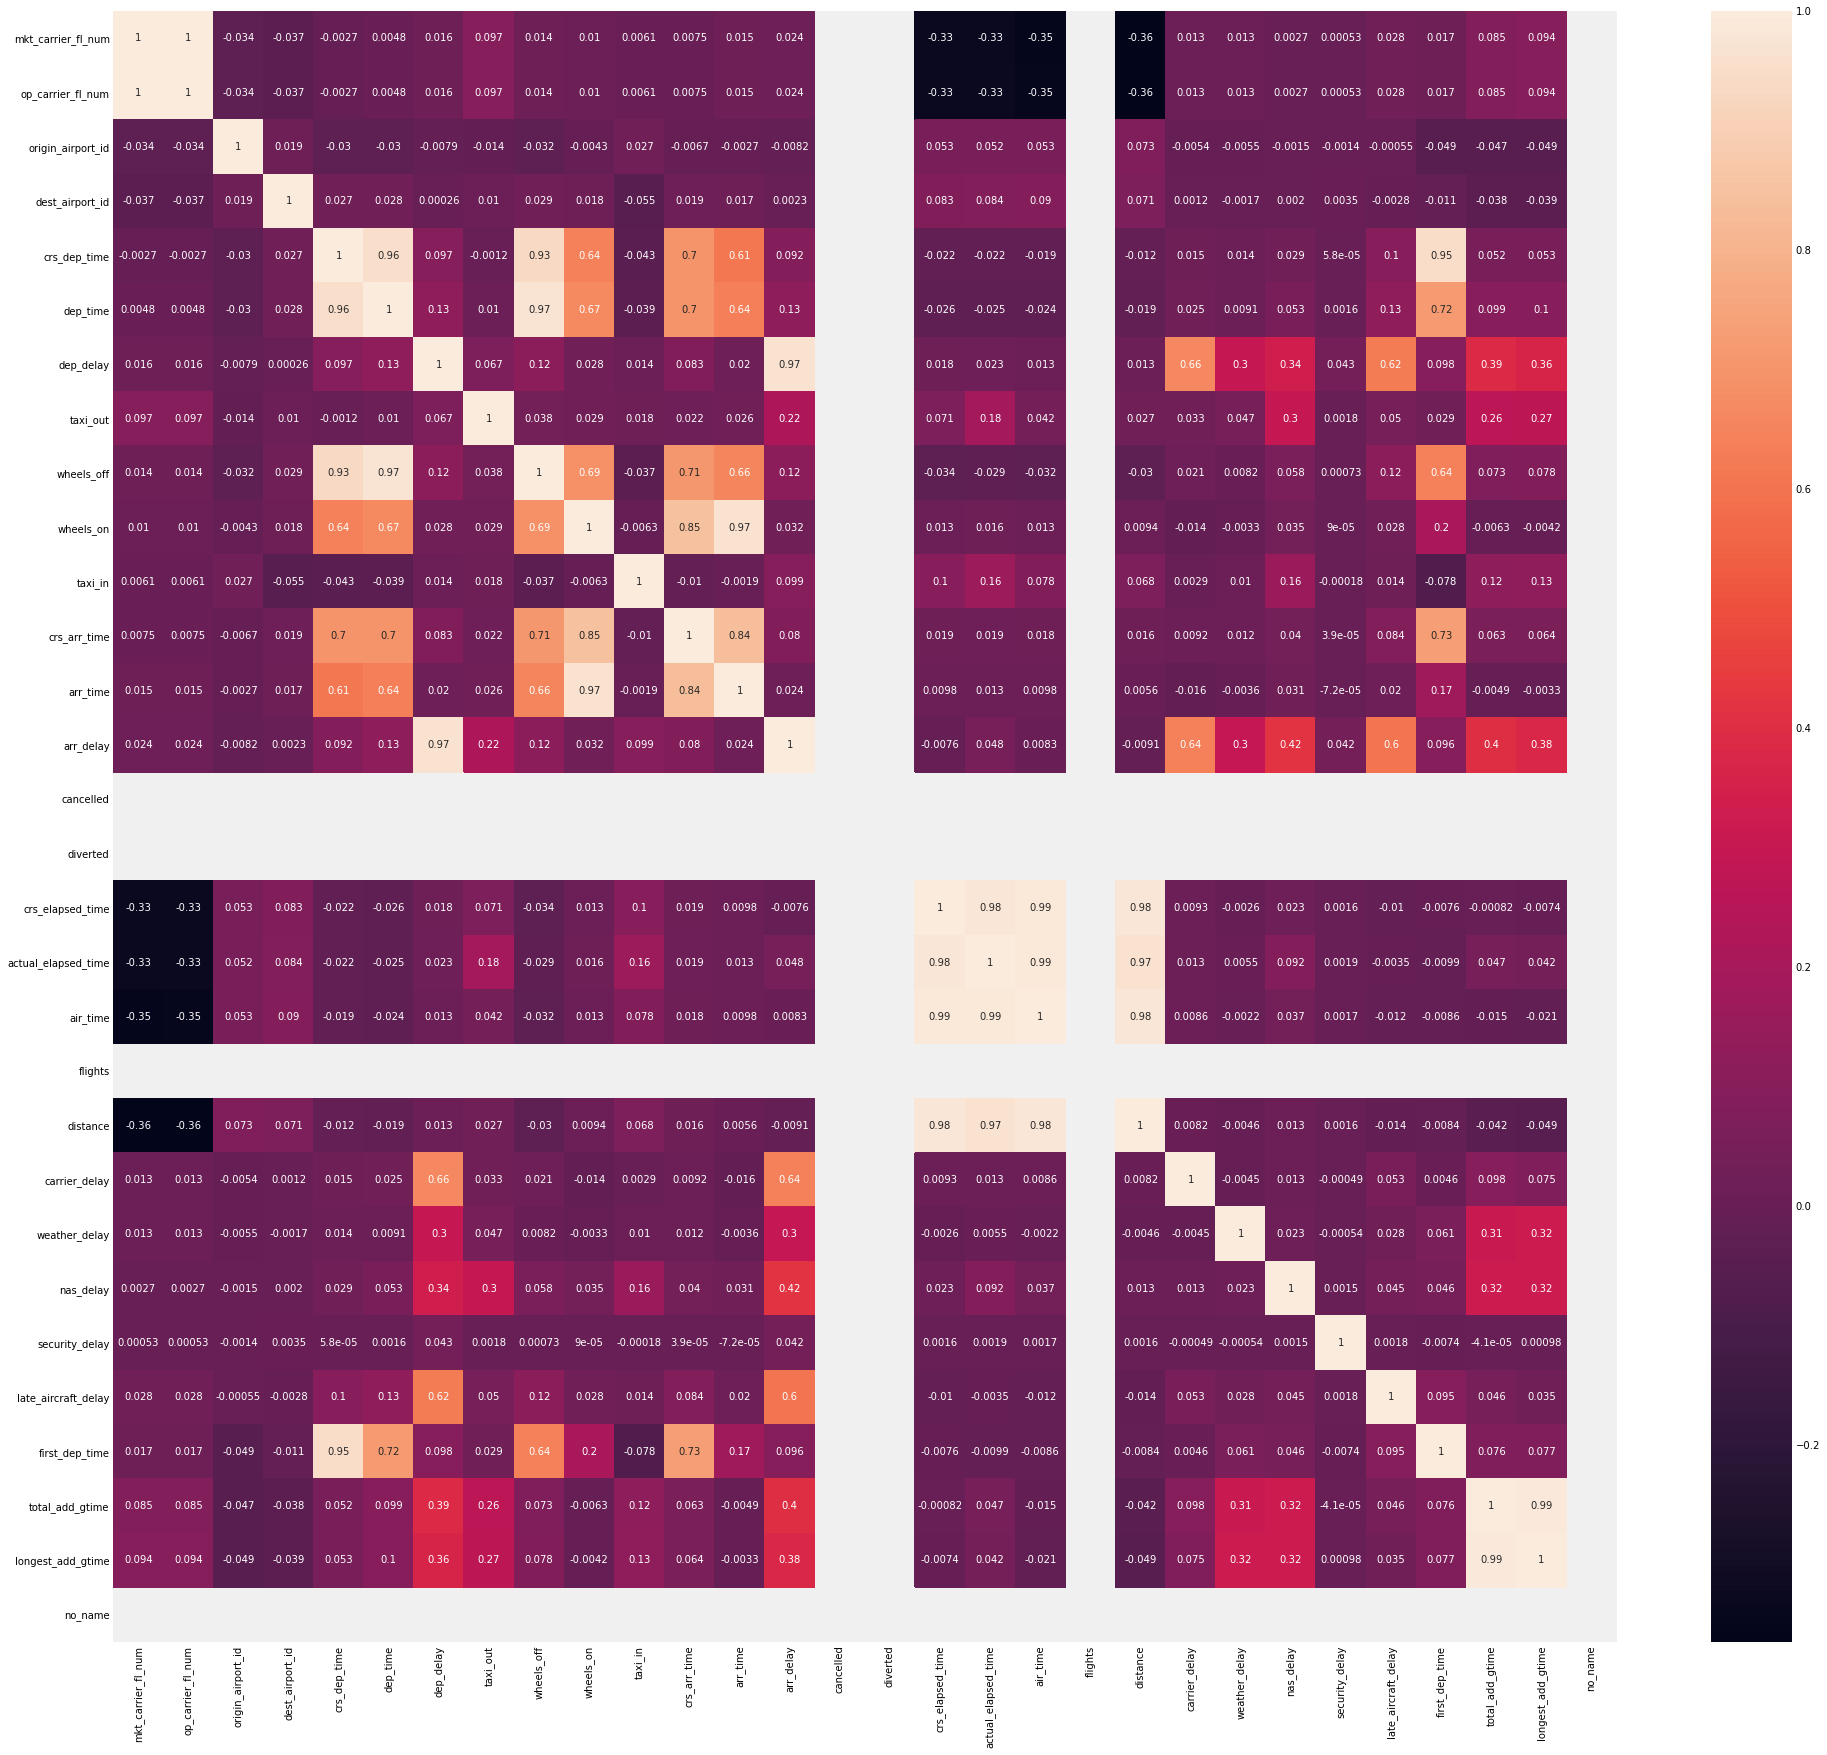

In [7]:
# Calculate Correlated features from sample
Corr = test2.corr(method ='pearson')

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sn.heatmap(Corr, annot=True)
plt.show()



In [8]:
df=data.copy()
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (500000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
column type,datetime64[ns],object,object,object,int64,object,object,int64,int64,object,object,int64,object,object,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,object,int64,object,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,1763,0,0,0,0,0,0,0,0,9364,9365,9664,9664,9979,9979,0,9979,11077,0,490247,0,0,0,11077,11077,0,0,405523,405523,405523,405523,405523,496460,496460,496460,500000
null values (%),0,0,0,0,0,0,0.3526,0,0,0,0,0,0,0,0,1.8728,1.873,1.9328,1.9328,1.9958,1.9958,0,1.9958,2.2154,0,98.0494,0,0,0,2.2154,2.2154,0,0,81.1046,81.1046,81.1046,81.1046,81.1046,99.292,99.292,99.292,100


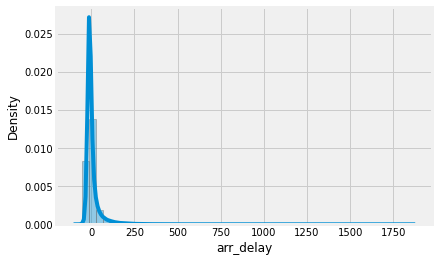

In [9]:
import seaborn as sns

# checking the distribution to see if there are any outliers
sns.distplot(test.loc[:,'arr_delay']);

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

<AxesSubplot:xlabel='dep_delay', ylabel='Density'>

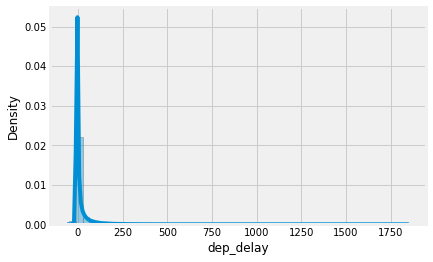

In [10]:
sns.distplot(test.loc[:,'dep_delay'])


In [11]:
test.loc[:,'dep_delay'].describe()

count    490635.000000
mean         11.075357
std          50.170771
min         -49.000000
25%          -6.000000
50%          -2.000000
75%           7.000000
max        1840.000000
Name: dep_delay, dtype: float64

In [12]:
test[test.loc[:,'dep_delay']<45]['dep_delay'].describe()

count    446079.000000
mean          0.237305
std          10.873727
min         -49.000000
25%          -6.000000
50%          -3.000000
75%           2.000000
max          44.000000
Name: dep_delay, dtype: float64

Text(0.5, 1.0, 'distributuin of the arrival delay')

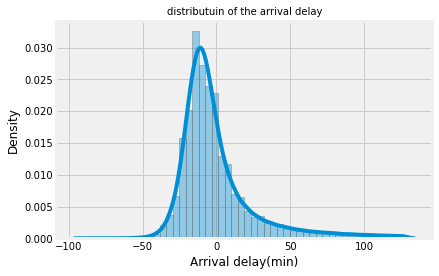

In [23]:
s=sns.distplot(test[test.loc[:,'arr_delay']<130]['arr_delay'])
s.set_xlabel('Arrival delay(min)')
s.set_title('distributuin of the arrival delay',fontsize=10)

<AxesSubplot:ylabel='Density'>

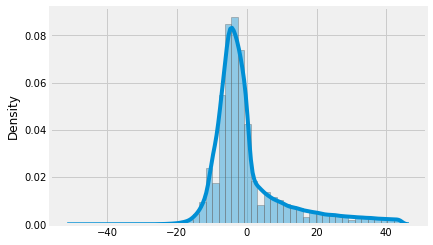

In [14]:
from sklearn.preprocessing import StandardScaler
d=test[test.loc[:,'dep_delay']<45][['dep_delay']]
ss=StandardScaler()
ss.fit(d)
sns.distplot(d)

In [24]:
sns.distplot(d['arr_delay'])

NameError: name 'd' is not defined

In [ ]:
#test[test.loc[:,'arr_delay']<50]['arr_delay'].describe()
test['arr_delay'].describe()
test[test.loc[:,'arr_delay']<135]['arr_delay'].describe()

In [ ]:
sns.distplot(test[test.loc[:,'arr_delay']<135]['arr_delay'])

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [32]:
test.groupby('')

KeyError: ''

In [33]:
data.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-09-14,AA,AA,AA,1059,AA,N552UW,1059,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1026,1022.0,-4.0,13.0,1035.0,1133.0,10.0,1205,1143.0,-22.0,0,NaN,0,N,99,81.0,58.0,1,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-04,DL,DL,DL,1216,DL,N961AT,1216,10431,AVL,"Asheville, NC",10397,ATL,"Atlanta, GA",600,553.0,-7.0,15.0,608.0,641.0,7.0,701,648.0,-13.0,0,NaN,0,N,61,55.0,33.0,1,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-05,UA,UA,UA,236,UA,N24706,236,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1430,1427.0,-3.0,30.0,1457.0,1626.0,4.0,1617,1630.0,13.0,0,NaN,0,N,107,123.0,89.0,1,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-11,AS,AS,AS,1936,AS,N624VA,1936,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1800,1841.0,41.0,23.0,1904.0,1958.0,11.0,1935,2009.0,34.0,0,NaN,0,N,95,88.0,54.0,1,337,2.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN
4,2019-05-19,AA,AA_CODESHARE,AA,5714,YV,N919FJ,5714,11298,DFW,"Dallas/Fort Worth, TX",11973,GPT,"Gulfport/Biloxi, MS",1025,1211.0,106.0,20.0,1231.0,1343.0,4.0,1203,1347.0,104.0,0,NaN,0,N,98,96.0,72.0,1,500,22.0,0.0,0.0,0.0,82.0,NaN,NaN,NaN,NaN


In [25]:
#test.groupby(pd.Grouper(key='fl_date',freq='M')).agg({'Revenue':'sum'})
#test.date = pd.to_datetime(test.fl_date)
test['date']=pd.to_datetime(test.fl_date)
dg = test.groupby(pd.Grouper(key='date', freq='1M')).mean()
#dg['dep_delay']

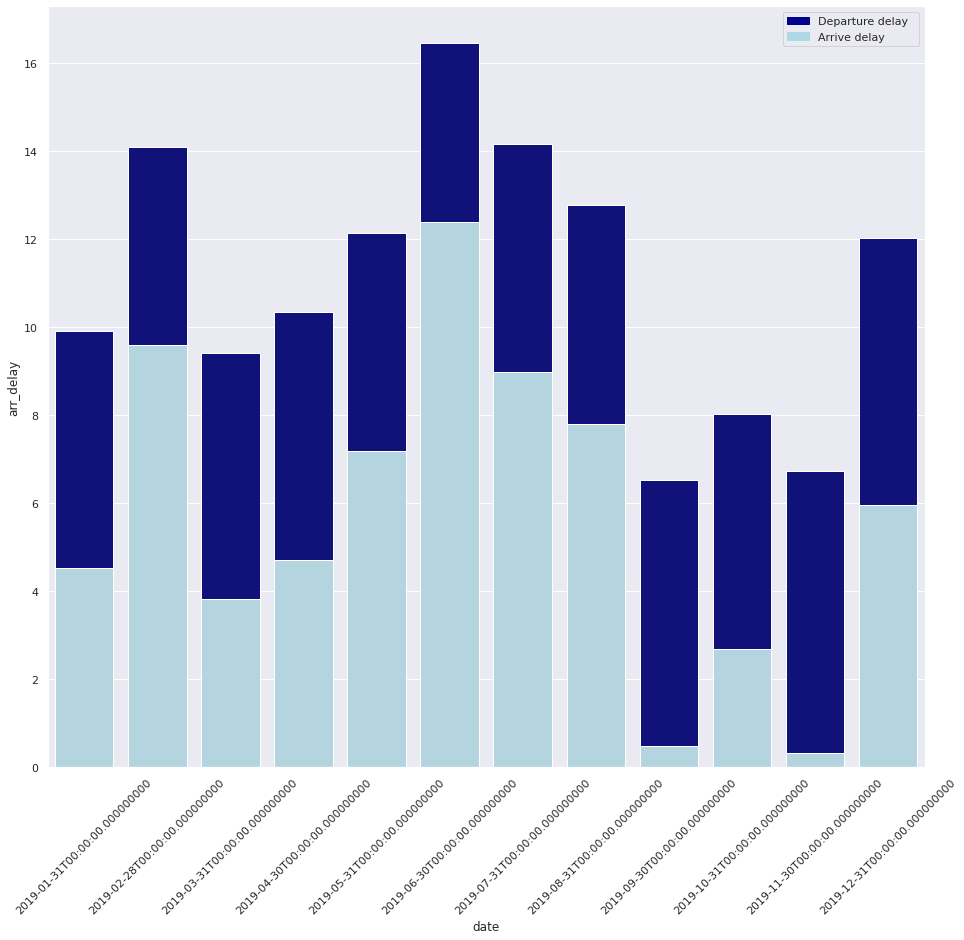

In [26]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
#tips = sns.load_dataset("tips")

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = dg.reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="date",  y="dep_delay", data=total, color='darkblue')



# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="date", y="arr_delay", data=total, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Departure delay  ')

bottom_bar = mpatches.Patch(color='lightblue', label='Arrive delay ')
plt.legend(handles=[top_bar, bottom_bar])
#plt.xticks(['Jan','Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=45)
# show the graph
plt.show()

In [ ]:
data = data.fillna(np.nan)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [16]:
taxi=test2[['taxi_in','taxi_out','crs_dep_time','crs_arr_time']]


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
import geopandas as gpd

In [9]:
test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [10]:
from geopy.geocoders import Nominatim
destloc=[]
for a in Dest_city:
    print(a)
    address=a   
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    #print(location.address)
    destloc.append([a,location.latitude, location.longitude])
destloc.size()


NameError: name 'Dest_city' is not defined

In [11]:
len(destloc)

0

In [12]:
Dest_city[99]

NameError: name 'Dest_city' is not defined

In [13]:
origloc=[]
for a in Orig_city:
    address=a   
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)
    #print(location.address)
    origloc.append([a,location.latitude, location.longitude])

NameError: name 'Orig_city' is not defined

In [14]:
test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [15]:
Dest=test.dest.unique()
Orig=test.origin.unique()


In [31]:
origloc=[]
for a in Orig:
    address=a+' Airport'   
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)

    #print(location.address)
    try:
        origloc.append([a,location.latitude, location.longitude])
    except:
        print(address)
        origloc.append([a,0, 0])

NameError: name 'Orig' is not defined

In [30]:
len(origloc)

NameError: name 'origloc' is not defined

In [28]:
orig_loc=pd.DataFrame(origloc,columns=['Origin_Arprt','Lat','Lon'])
orig_loc['Lat'].replace({0:48.162246},inplace=True)
orig_loc['Lon'].replace({0:-103.6313081 },inplace=True)
orig_loc[orig_loc['Origin_Arprt']=='ISN']

NameError: name 'origloc' is not defined

In [25]:
for a in orig_loc.iterrows():
    #print(a[1]['Origin_Arprt'])
    test2.loc[test2['origin']==a[1]['Origin_Arprt'],'Lat']=a[1]['Lat']
    test2.loc[test2['origin']==a[1]['Origin_Arprt'],'Lon']=a[1]['Lon']
    #print(test2.loc[test2['origin_airport_id']==a[1]['Origin_Arprt'],'Lon'])
#(test2['origin']=='SFO').sum()

SFO
AVL
ATL
DFW
DCA
SGF
LAX
RIC
FCA
ORD
SAN
PHX
DEN
BHM
JFK
SAV
SEA
IAD
ORF
HOU
ANC
PHL
MCO
HNL
BUR
DAY
CVG
LIT
MDW
MKE
RSW
CLT
RDU
DTW
PIA
SBA
IND
JAC
LGA
BWI
TUL
SDF
TYS
ALB
SMF
MSY
DAL
CMH
PBI
SHV
BOS
PSP
MOB
LAS
MCI
GFK
EWR
SJC
TPA
STL
FLL
BNA
CLE
MFE
ONT
ACY
MSP
JAX
MIA
ROA
SLC
GTR
IAH
SUN
SCE
BIL
CHS
EVV
PIE
PDX
BTV
LFT
LEX
BUF
ROC
MSN
GNV
PSC
BFL
BIS
SYR
ISP
AUS
OAK
MDT
LNY
HSV
EYW
AMA
XNA
SJT
SNA
MSO
PIT
BQN
GSP
LAN
BDL
BTR
HPN
PWM
OMA
MMH
CHO
TUS
AZA
JNU
JHM
FSD
COS
MEM
CID
GEG
CHA
SJU
RFD
GRR
RNO
PVD
SRQ
SAT
LRD
USA
SLN
BLI
CRW
ABQ
KOA
GJT
PHF
ATW
OKC
PUB
FWA
MFR
GSO
HTS
RAP
ITH
CRP
LGB
SFB
CAE
AVP
SBP
EUG
VPS
ACT
CWA
HYS
FAR
FAT
PNS
BOI
GRK
GRB
MLI
LAW
OGG
HHH
BLV
MAF
PIH
BJI
BRO
MYR
TOL
GPT
LSE
DBQ
ROW
DRO
BMI
HLN
OAJ
GGG
FAI
HRL
HDN
AZO
ABE
BGR
DAB
ECP
FSM
MLB
GCC
MLU
MHT
TRI
RST
LBL
SWO
ABY
DSM
DUT
ILM
RDD
LIH
BZN
MTJ
ELP
KTN
ICT
PVU
PGD
PBG
COU
MOT
XWA
SPI
FNT
PSE
FLO
SAF
CAK
EGE
PSG
ERI
BGM
JAN
TTN
JLN
CLL
RDM
ACK
TVC
GRI
AGS
EAU
SUX
STX
FAY
BTM
MHK
MRY
ITO
EWN
ALO
ELM


In [ ]:
test2


In [29]:
count_flights = test2['origin'].value_counts()
#___________________________
plt.figure(figsize=(11,11))
#________________________________________
# define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green']
size_limits = [1, 1000, 10000, 50000, 500000]
labels = []
for i in range(len(size_limits)-1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i+1])) 
#____________________________________________________________
map = Basemap(source=cx.providers.Stamen.TonerLite,resolution='l',llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0,)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')
#_____________________
# put airports on map
for index, (code, y,x) in test2[['origin','Lat','Lon']].iterrows():
    x, y = map(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    map.plot(x, y, marker='o', markersize = ind+10, markeredgewidth = 1, color = colors[ind],
             markeredgecolor='k', label = labels[ind])

NameError: name 'cx' is not defined

<Figure size 792x792 with 0 Axes>

array([], dtype=object)

#### **Extra Task**: The percentage of delays for each Carrier
 

In [ ]:
test['Arrival_delay'] = test['arr_delay'].apply(lambda x: x > 0)
test['Departure_delay'] = test['dep_delay'].apply(lambda x: x > 0)
#test

In [ ]:
Arrival_delayed_flights = test[test['Arrival_delay'] == True] #filter to only rows where delayer == True
Arrival_delayed_flights['mkt_unique_carrier'].value_counts() #count the number of rows for each carrier
Departure_delayed_flights = test[test['Departure_delay'] == True] #filter to only rows where delayer == True
Departure_delayed_flights['mkt_unique_carrier'].value_counts() #count the number of rows for each carrier 


AA    41774
WN    38102
DL    31300
UA    29821
AS     8070
B6     7097
NK     4010
F9     3324
G4     2081
HA     1703
Name: mkt_unique_carrier, dtype: int64

In [ ]:
Carrier_delay=test[['mkt_unique_carrier','Arrival_delay','Departure_delay','mkt_carrier_fl_num']].groupby('mkt_unique_carrier').\
    agg({'Arrival_delay':'sum','Departure_delay':'sum','mkt_carrier_fl_num':'count'})
Carrier_delay['Total_delay']=Carrier_delay['Arrival_delay']+Carrier_delay['Departure_delay']
Carrier_delay['Percentage_Arrival_delay']=Carrier_delay['Arrival_delay']/Carrier_delay['Arrival_delay'].sum()*100
Carrier_delay['Percentage_Departure_delay']=Carrier_delay['Departure_delay']/Carrier_delay['Departure_delay'].sum()*100
Carrier_delay['Percentage_totdelay_totflights']=Carrier_delay['Total_delay']/Carrier_delay['mkt_carrier_fl_num']*100
Carrier_delay=Carrier_delay.sort_values(by='Percentage_totdelay_totflights',ascending=False).reset_index()

Text(0.5, 0, 'Carrier')

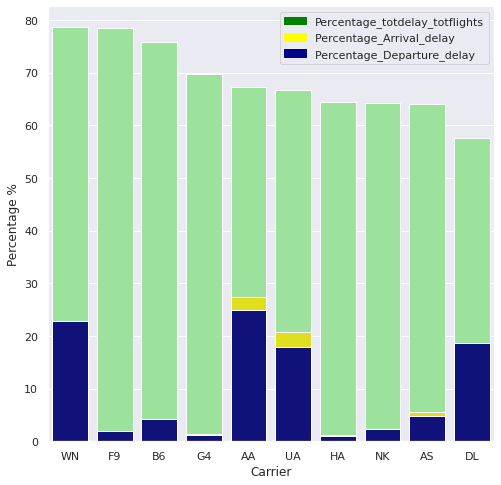

In [ ]:
plt.figure(figsize=(8, 8))
bar1=sns.barplot(x="mkt_unique_carrier",y='Percentage_totdelay_totflights',data=Carrier_delay,color='lightgreen')
bar2=sns.barplot(x="mkt_unique_carrier",y='Percentage_Arrival_delay',data=Carrier_delay,color='yellow')
bar3=sns.barplot(x="mkt_unique_carrier",y='Percentage_Departure_delay',data=Carrier_delay,color='darkblue')
bar1 = mpatches.Patch(color='green', label='Percentage_totdelay_totflights')
bar2 = mpatches.Patch(color='yellow', label='Percentage_Arrival_delay ')
bar3 = mpatches.Patch(color='darkblue', label='Percentage_Departure_delay  ')
plt.legend(handles=[bar1, bar2,bar3])
plt.ylabel('Percentage %')
plt.xlabel('Carrier')
#ax = sns.barplot(x="day", y="total_bill", data=tips)

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
#we need the passenger table

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

### Features


In [78]:
test3=test2.copy() #according to arrvie delay
test3['TotalDelay'] = test3.apply(lambda x: ((x['dep_delay'] + 
                                        x['arr_delay'] +
                                        x['carrier_delay'] +
                                        x['weather_delay'] + 
                                        x['nas_delay'] + 
                                        x['security_delay'] +
                                        x['late_aircraft_delay'])),  axis=1)


   #### IS DELAYED

In [236]:

test3.loc[(test3['TotalDelay'].ge(0)),"is_delayed"]=1
test3.loc[~(test3['TotalDelay'].ge(0)),"is_delayed"]=0

In [239]:
test3.loc[(test3['arr_delay'].ge(0)),"is_delayed"]=1
test3.loc[~(test3['arr_delay'].ge(0)),"is_delayed"]=0

Day,Month, Day of week

In [231]:

test3["year"]=test3['fl_date'].dt.year
test3["month"]=test3['fl_date'].dt.month
test3["day"]=test3['fl_date'].dt.day
test3["dayOfWeek"]=test3['fl_date'].dt.dayofweek


In [65]:
test3

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,is_delayed,year,month,day,dayOfWeek
0,2019-09-14,AA,AA,AA,1059,AA,N552UW,1059,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1026,1022.0,-4.0,13.0,1035.0,1133.0,10.0,1205,1143.0,-22.0,0,NaN,0,N,99,81.0,58.0,1,337,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2019,9,14,5
1,2019-06-04,DL,DL,DL,1216,DL,N961AT,1216,10431,AVL,"Asheville, NC",10397,ATL,"Atlanta, GA",600,553.0,-7.0,15.0,608.0,641.0,7.0,701,648.0,-13.0,0,NaN,0,N,61,55.0,33.0,1,164,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2019,6,4,1
2,2019-06-05,UA,UA,UA,236,UA,N24706,236,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1430,1427.0,-3.0,30.0,1457.0,1626.0,4.0,1617,1630.0,13.0,0,NaN,0,N,107,123.0,89.0,1,534,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,6,5,2
3,2019-09-11,AS,AS,AS,1936,AS,N624VA,1936,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1800,1841.0,41.0,23.0,1904.0,1958.0,11.0,1935,2009.0,34.0,0,NaN,0,N,95,88.0,54.0,1,337,2.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,1.0,2019,9,11,2
4,2019-05-19,AA,AA_CODESHARE,AA,5714,YV,N919FJ,5714,11298,DFW,"Dallas/Fort Worth, TX",11973,GPT,"Gulfport/Biloxi, MS",1025,1211.0,106.0,20.0,1231.0,1343.0,4.0,1203,1347.0,104.0,0,NaN,0,N,98,96.0,72.0,1,500,22.0,0.0,0.0,0.0,82.0,NaN,NaN,NaN,NaN,1.0,2019,5,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2019-03-03,UA,UA,UA,2275,UA,N78506,2275,11618,EWR,"Newark, NJ",14635,RSW,"Fort Myers, FL",1600,1557.0,-3.0,15.0,1612.0,1849.0,4.0,1906,1853.0,-13.0,0,NaN,0,N,186,176.0,157.0,1,1068,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2019,3,3,6
499996,2019-11-10,UA,UA_CODESHARE,UA,6061,YV,N88301,6061,12266,IAH,"Houston, TX",14492,RDU,"Raleigh/Durham, NC",1420,1420.0,0.0,15.0,1435.0,1755.0,6.0,1759,1801.0,2.0,0,NaN,0,N,159,161.0,140.0,1,1042,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,11,10,6
499997,2019-03-11,AS,AS_CODESHARE,AS,3303,OO,N181SY,3303,15376,TUS,"Tucson, AZ",14831,SJC,"San Jose, CA",815,806.0,-9.0,15.0,821.0,1007.0,7.0,1030,1014.0,-16.0,0,NaN,0,N,135,128.0,106.0,1,722,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2019,3,11,0
499998,2019-01-03,DL,DL_CODESHARE,DL,5738,CP,N603CZ,5738,14869,SLC,"Salt Lake City, UT",10140,ABQ,"Albuquerque, NM",940,940.0,0.0,28.0,1008.0,1114.0,6.0,1130,1120.0,-10.0,0,NaN,0,N,110,100.0,66.0,1,493,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2019,1,3,3


In [81]:
test4


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,is_delayed,year,month,day,dayOfWeek
2,2019-06-05,UA,UA,UA,236,UA,N24706,236,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1430,1427.0,-3.0,30.0,1457.0,1626.0,4.0,1617,1630.0,13.0,0,NaN,0,N,107,123.0,89.0,1,534,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,6,5,2
3,2019-09-11,AS,AS,AS,1936,AS,N624VA,1936,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1800,1841.0,41.0,23.0,1904.0,1958.0,11.0,1935,2009.0,34.0,0,NaN,0,N,95,88.0,54.0,1,337,2.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,1.0,2019,9,11,2
11,2019-04-17,AA,AA,AA,1062,AA,N874NN,1062,13930,ORD,"Chicago, IL",15016,STL,"St. Louis, MO",1824,1842.0,18.0,16.0,1858.0,1943.0,5.0,1939,1948.0,9.0,0,NaN,0,N,75,66.0,45.0,1,258,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,4,17,2
27,2019-10-08,WN,WN,WN,2142,WN,N752SW,2142,12191,HOU,"Houston, TX",13796,OAK,"Oakland, CA",1300,1328.0,28.0,10.0,1338.0,1532.0,10.0,1505,1542.0,37.0,0,NaN,0,N,245,254.0,234.0,1,1642,28.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,10,8,1
38,2019-07-09,DL,DL,DL,2088,DL,N900DE,2088,12992,LIT,"Little Rock, AR",10397,ATL,"Atlanta, GA",1206,1204.0,-2.0,30.0,1234.0,1438.0,5.0,1440,1443.0,3.0,0,NaN,0,N,94,99.0,64.0,1,453,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,7,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499988,2019-04-29,G4,G4,G4,1683,G4,257NV,1683,10135,ABE,"Allentown/Bethlehem/Easton, PA",14082,PGD,"Punta Gorda, FL",2032,2043.0,11.0,9.0,2052.0,2310.0,4.0,2311,2314.0,3.0,0,NaN,0,N,159,151.0,138.0,1,1018,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,4,29,0
499989,2019-04-23,AS,AS_CODESHARE,AS,2726,QX,N645QX,2726,14679,SAN,"San Diego, CA",15016,STL,"St. Louis, MO",1015,1028.0,13.0,19.0,1047.0,1612.0,5.0,1555,1617.0,22.0,0,NaN,0,N,220,229.0,205.0,1,1557,13.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,4,23,1
499991,2019-07-13,WN,WN,WN,5273,WN,N924WN,5273,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1505,1527.0,22.0,11.0,1538.0,1700.0,4.0,1655,1704.0,9.0,0,NaN,0,N,110,97.0,82.0,1,554,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,7,13,5
499992,2019-08-31,AS,AS_CODESHARE,AS,2830,QX,N625QX,2830,14004,PAE,"Everett, WA",14771,SFO,"San Francisco, CA",1505,1501.0,-4.0,31.0,1532.0,1725.0,4.0,1720,1729.0,9.0,0,NaN,0,N,135,148.0,113.0,1,710,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,2019,8,31,5


<BarContainer object of 7 artists>

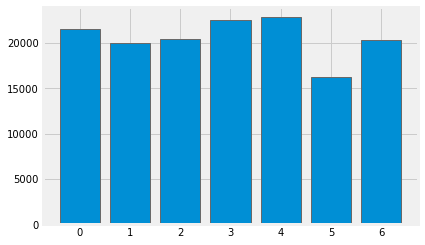

In [86]:
test4=test3[(test3['is_delayed']==1)&(test3['arr_delay']<60)]
#test4=test3[(test3['arr_delay']<60)&(test3['arr_delay']>-60)]
test5=test4[['dayOfWeek','arr_delay']].groupby('dayOfWeek').count().reset_index()
test6=test4[['dayOfWeek','arr_delay']].groupby('dayOfWeek').mean().reset_index()
plt.bar(test5['dayOfWeek'],test5['arr_delay'])
#plt.yticks(rotation=45)


<BarContainer object of 7 artists>

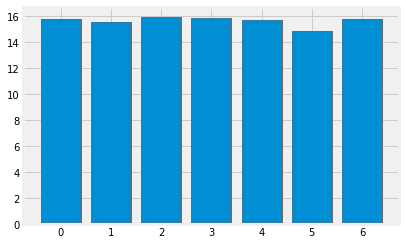

In [87]:
plt.bar(test6['dayOfWeek'],test6['arr_delay'])

the delay is not much related to the day of the week

<BarContainer object of 12 artists>

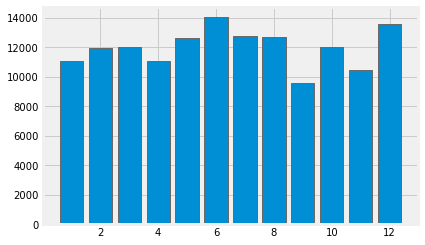

In [88]:
test5=test4[['month','arr_delay']].groupby('month').count().reset_index()
test6=test4[['month','arr_delay']].groupby('month').mean().reset_index()
plt.bar(test5['month'],test5['arr_delay'])

<BarContainer object of 12 artists>

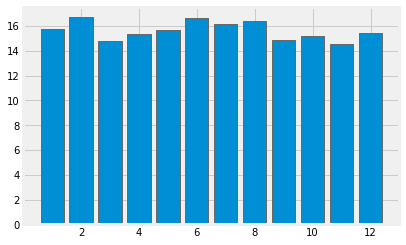

In [89]:
plt.bar(test6['month'],test6['arr_delay'])

Flight Speed

In [92]:
test3['Speed Mile/Min']=test3.apply(lambda x: ((x['distance'] / (x['actual_elapsed_time']/60)
              )),  axis=1)

In [100]:
test3['crs_Speed Mile/Min']=test3.apply(lambda x: ((x['distance'] / (x['crs_elapsed_time']/60)
              )),  axis=1)

In [104]:
test3['diffSpd']=test3['crs_Speed Mile/Min']-test3['Speed Mile/Min']

In [105]:
test4=test3[(test3['is_delayed']==1)&(test3['arr_delay']<60)]

(array([2.0000e+01, 4.6000e+02, 5.5940e+03, 2.6583e+04, 4.6080e+04,
        4.4551e+04, 1.6711e+04, 3.4120e+03, 4.5600e+02, 2.3000e+01]),
 array([-144. , -114.9,  -85.8,  -56.7,  -27.6,    1.5,   30.6,   59.7,
          88.8,  117.9,  147. ]),
 <BarContainer object of 10 artists>)

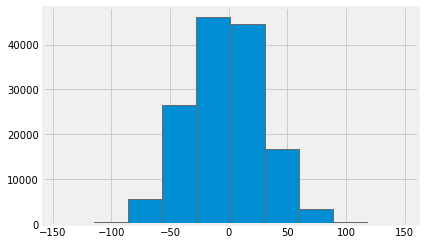

In [106]:
plt.hist(round(test4['diffSpd']))

### By AirLine

([<matplotlib.patches.Wedge at 0x7fd0e03c3af0>,
 [Text(0.7445818690697812, 0.8096899655130669, 'AA'),
  Text(-0.2856557403514936, 1.0622621136067314, 'AS'),
  Text(-0.5792722764121894, 0.9351169070122946, 'B6'),
  Text(-1.046997591235401, 0.3373366922634838, 'DL'),
  Text(-1.0382779229028107, -0.36328907885129913, 'F9'),
  Text(-0.9955407730205916, -0.46786597360094806, 'G4'),
  Text(-0.950479285129702, -0.5537049110666535, 'HA'),
  Text(-0.878605890886723, -0.6618547336834179, 'NK'),
  Text(-0.30850205955596915, -1.055853436443584, 'UA'),
  Text(0.8789669016965156, -0.6613752230935387, 'WN')])

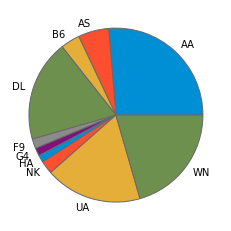

In [118]:
test5=test4[['mkt_unique_carrier','arr_delay','TotalDelay']].groupby('mkt_unique_carrier').count().reset_index()
plt.pie(test5['arr_delay'],labels=test5['mkt_unique_carrier'])

In [182]:
test51=test5[['mkt_unique_carrier','arr_delay']].sort_values(by ='arr_delay',ascending=False)
test51

,mkt_unique_carrier,arr_delay
0,AA,37890
9,WN,29545
3,DL,27094
8,UA,25875
1,AS,8197
2,B6,5173
7,NK,3480
4,F9,2598
5,G4,2108
6,HA,1930


In [160]:
test55=test5['arr_delay'].describe().reset_index()
mean=test55.loc[test55['index']=='mean','arr_delay'].values[0]
test52=test5[test51['arr_delay'].gt(mean)]

In [162]:
test52['Airline_coeff']=(test52['arr_delay']-mean)/mean

In [170]:
for a in test52.iterrows():
    test3.loc[test3['mkt_unique_carrier']==a[1]['mkt_unique_carrier'],'Airline_coeff']=\
    a[1]['Airline_coeff']
test3['Airline_coeff'].fillna(0,inplace=True)

In [173]:
#test3['Airline_coeff'].isnull().sum()

## origin airport

In [174]:
test3.dest.str.strip()
test3.origin.str.strip()
Dest=test3.dest.unique()
Orig=test3.origin.unique()


In [176]:
from geopy.geocoders import Nominatim
origloc=[]
for a in Orig:
    address=a+' Airport'   
    geolocator = Nominatim(user_agent="Your_Name")
    location = geolocator.geocode(address)

    #print(location.address)
    try:
        origloc.append([a,location.latitude, location.longitude])
    except:
        print(address)
        origloc.append([a,0, 0])

ISN Airport


In [179]:
test8=test3[['origin','arr_delay','TotalDelay']].groupby('origin').sum().reset_index()

In [180]:
test8

,origin,arr_delay,TotalDelay
0,ABE,2303.0,12154.0
1,ABI,179.0,2328.0
2,ABQ,7500.0,40352.0
3,ABR,531.0,2364.0
4,ABY,89.0,1253.0
...,...,...,...
368,XNA,6267.0,30256.0
369,XWA,113.0,939.0
370,YAK,59.0,410.0
371,YKM,230.0,1031.0


In [181]:
orig_loc=pd.DataFrame(origloc,columns=['Origin_Arprt','Lat','Lon'])
orig_loc['Lat'].replace({0:48.162246},inplace=True)
orig_loc['Lon'].replace({0:-103.6313081 },inplace=True)
orig_loc[orig_loc['Origin_Arprt']=='ISN']

,Origin_Arprt,Lat,Lon
277,ISN,48.162246,-103.631308


In [190]:
orig_loc

,Origin_Arprt,Lat,Lon
0,SFO,37.622452,-122.384072
1,AVL,35.436423,-82.540881
2,ATL,33.637799,-84.429271
3,DFW,32.896519,-97.046522
4,DCA,38.851289,-77.039689
...,...,...,...
368,HYA,41.670766,-70.284390
369,OGD,41.194563,-112.013520
370,GST,12.982778,80.169325
371,AKN,58.675317,-156.649387


In [196]:
for a in orig_loc.iterrows():
    
    test3.loc[test3['origin']==a[1]['Origin_Arprt'],"Lat"]=a[1]["Lat"]
    test3.loc[test3['origin']==a[1]['Origin_Arprt'],"Lon"]=a[1]["Lon"]


In [198]:
test3

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,...,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,TotalDelay,is_delayed,year,month,day,dayOfWeek,Speed,Speed Mile/Min,crs_Speed Mile/Min,diffSpd,Airline_coeff,Lat,Lon
0,2019-09-14,AA,AA,AA,1059,AA,N552UW,1059,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1026,1022.0,-4.0,13.0,1035.0,1133.0,10.0,1205,1143.0,-22.0,0,...,58.0,1,337,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-26.0,0.0,2019,9,14,5,204.242424,249.629630,204.242424,-45.387205,1.633262,37.622452,-122.384072
1,2019-06-04,DL,DL,DL,1216,DL,N961AT,1216,10431,AVL,"Asheville, NC",10397,ATL,"Atlanta, GA",600,553.0,-7.0,15.0,608.0,641.0,7.0,701,648.0,-13.0,0,...,33.0,1,164,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-20.0,0.0,2019,6,4,1,161.311475,178.909091,161.311475,-17.597615,0.882966,35.436423,-82.540881
2,2019-06-05,UA,UA,UA,236,UA,N24706,236,10397,ATL,"Atlanta, GA",12264,IAD,"Washington, DC",1430,1427.0,-3.0,30.0,1457.0,1626.0,4.0,1617,1630.0,13.0,0,...,89.0,1,534,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,10.0,1.0,2019,6,5,2,299.439252,260.487805,299.439252,38.951447,0.798249,33.637799,-84.429271
3,2019-09-11,AS,AS,AS,1936,AS,N624VA,1936,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1800,1841.0,41.0,23.0,1904.0,1958.0,11.0,1935,2009.0,34.0,0,...,54.0,1,337,2.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,109.0,1.0,2019,9,11,2,212.842105,229.772727,212.842105,-16.930622,0.000000,37.622452,-122.384072
4,2019-05-19,AA,AA_CODESHARE,AA,5714,YV,N919FJ,5714,11298,DFW,"Dallas/Fort Worth, TX",11973,GPT,"Gulfport/Biloxi, MS",1025,1211.0,106.0,20.0,1231.0,1343.0,4.0,1203,1347.0,104.0,0,...,72.0,1,500,22.0,0.0,0.0,0.0,82.0,NaN,NaN,NaN,NaN,314.0,1.0,2019,5,19,6,306.122449,312.500000,306.122449,-6.377551,1.633262,32.896519,-97.046522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2019-03-03,UA,UA,UA,2275,UA,N78506,2275,11618,EWR,"Newark, NJ",14635,RSW,"Fort Myers, FL",1600,1557.0,-3.0,15.0,1612.0,1849.0,4.0,1906,1853.0,-13.0,0,...,157.0,1,1068,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-16.0,0.0,2019,3,3,6,344.516129,364.090909,344.516129,-19.574780,0.798249,40.689064,-74.177255
499996,2019-11-10,UA,UA_CODESHARE,UA,6061,YV,N88301,6061,12266,IAH,"Houston, TX",14492,RDU,"Raleigh/Durham, NC",1420,1420.0,0.0,15.0,1435.0,1755.0,6.0,1759,1801.0,2.0,0,...,140.0,1,1042,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0,1.0,2019,11,10,6,393.207547,388.322981,393.207547,4.884566,0.798249,29.984142,-95.332986
499997,2019-03-11,AS,AS_CODESHARE,AS,3303,OO,N181SY,3303,15376,TUS,"Tucson, AZ",14831,SJC,"San Jose, CA",815,806.0,-9.0,15.0,821.0,1007.0,7.0,1030,1014.0,-16.0,0,...,106.0,1,722,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-25.0,0.0,2019,3,11,0,320.888889,338.437500,320.888889,-17.548611,0.000000,32.112379,-110.939388
499998,2019-01-03,DL,DL_CODESHARE,DL,5738,CP,N603CZ,5738,14869,SLC,"Salt Lake City, UT",10140,ABQ,"Albuquerque, NM",940,940.0,0.0,28.0,1008.0,1114.0,6.0,1130,1120.0,-10.0,0,...,66.0,1,493,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-10.0,0.0,2019,1,3,3,268.909091,295.800000,268.909091,-26.890909,0.882966,40.790066,-111.979898


In [200]:
test4=test3[(test3['is_delayed']==1)&(test3['arr_delay']<60)]

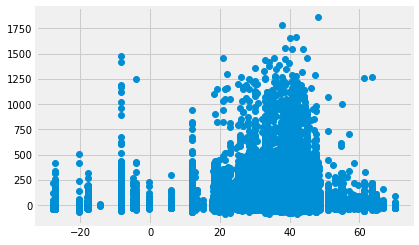

In [199]:
plt.scatter(test3["Lat"],test3["arr_delay"])

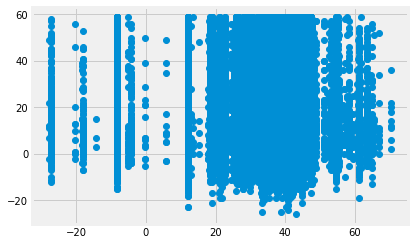

In [201]:
plt.scatter(test4["Lat"],test4["arr_delay"])

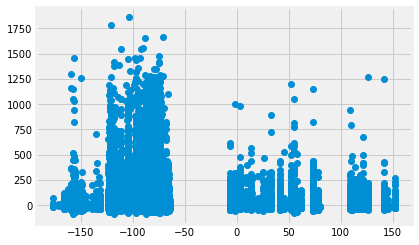

In [241]:
plt.scatter(test3["Lon"],test3["arr_delay"])

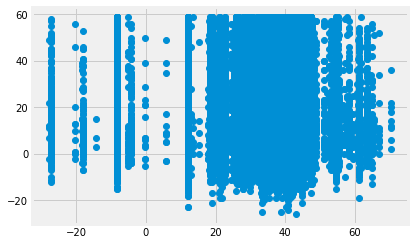

In [240]:
plt.scatter(test4["Lat"],test4["arr_delay"])

it shows that the origin airport has influence on arr_delay

## by Hour

In [220]:
test3['dep_hour']=test3['dep_time'].apply(lambda x: (x//100))

In [221]:
test3[['dep_hour','dep_time']]


,dep_hour,dep_time
0,10.0,1022.0
1,5.0,553.0
2,14.0,1427.0
3,18.0,1841.0
4,12.0,1211.0
...,...,...
499995,15.0,1557.0
499996,14.0,1420.0
499997,8.0,806.0
499998,9.0,940.0


In [242]:
test4=test3[(test3['is_delayed']==1)&(test3['arr_delay']<60)]

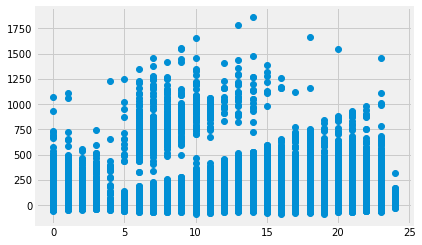

In [243]:
plt.scatter(test3['dep_hour'],test3['arr_delay'])

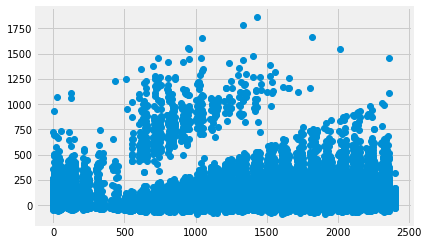

In [244]:
plt.scatter(test3['dep_time'],test3['arr_delay'])

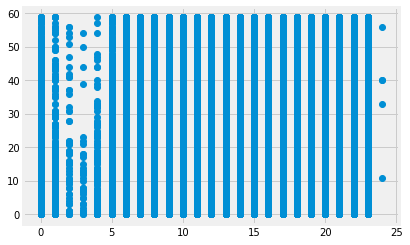

In [245]:
plt.scatter(test4['dep_hour'],test4['arr_delay'])

In [247]:
test3.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'TotalDelay', 'is_delayed', 'year',
       'month', 'day', 'dayOfWeek', 'Speed', 'Speed Mile/Min',
       'crs_Speed Mile/Min', 'diffSpd', 'Airline_coeff', 'Lat', 'Lon',
       'dep_hour'],
      dtype='object')

## Distance

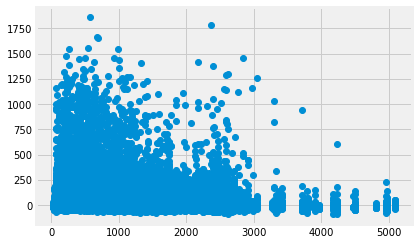

In [249]:
plt.scatter(test3['distance'],test3['arr_delay'])

## By root

In [251]:
test3['rout']=test3['origin']+test3['dest']

In [260]:
test10=test3[['arr_delay','rout','TotalDelay','flights']].groupby('rout').sum()
test10['avg_delay']=test10['arr_delay']/test10['flights']

In [263]:
test10.sort_values(by=['arr_delay','avg_delay'],ascending=False)

,arr_delay,TotalDelay,flights,avg_delay
rout,,,,
ORDLGA,16874.0,58214.0,851,19.828437
LGAORD,14543.0,56193.0,888,16.377252
MCOEWR,11380.0,39370.0,444,25.630631
BOSLGA,10754.0,42137.0,643,16.724728
LGABOS,9297.0,36492.0,604,15.392384
...,...,...,...,...
FAIANC,-1348.0,-2173.0,156,-8.641026
ORFATL,-1383.0,-1018.0,176,-7.857955
RICATL,-1663.0,-45.0,251,-6.625498


In [264]:
X=test3[['distance','TotalDelay', 'is_delayed',
       'month', 'day', 'dayOfWeek','Airline_coeff', 'Lat', 'Lon',
       'dep_hour']]
y=test3['arr_delay']
test_f=test3[['distance','TotalDelay', 'is_delayed',
       'month', 'day', 'dayOfWeek','Airline_coeff', 'Lat', 'Lon',
       'dep_hour','arr_delay']]

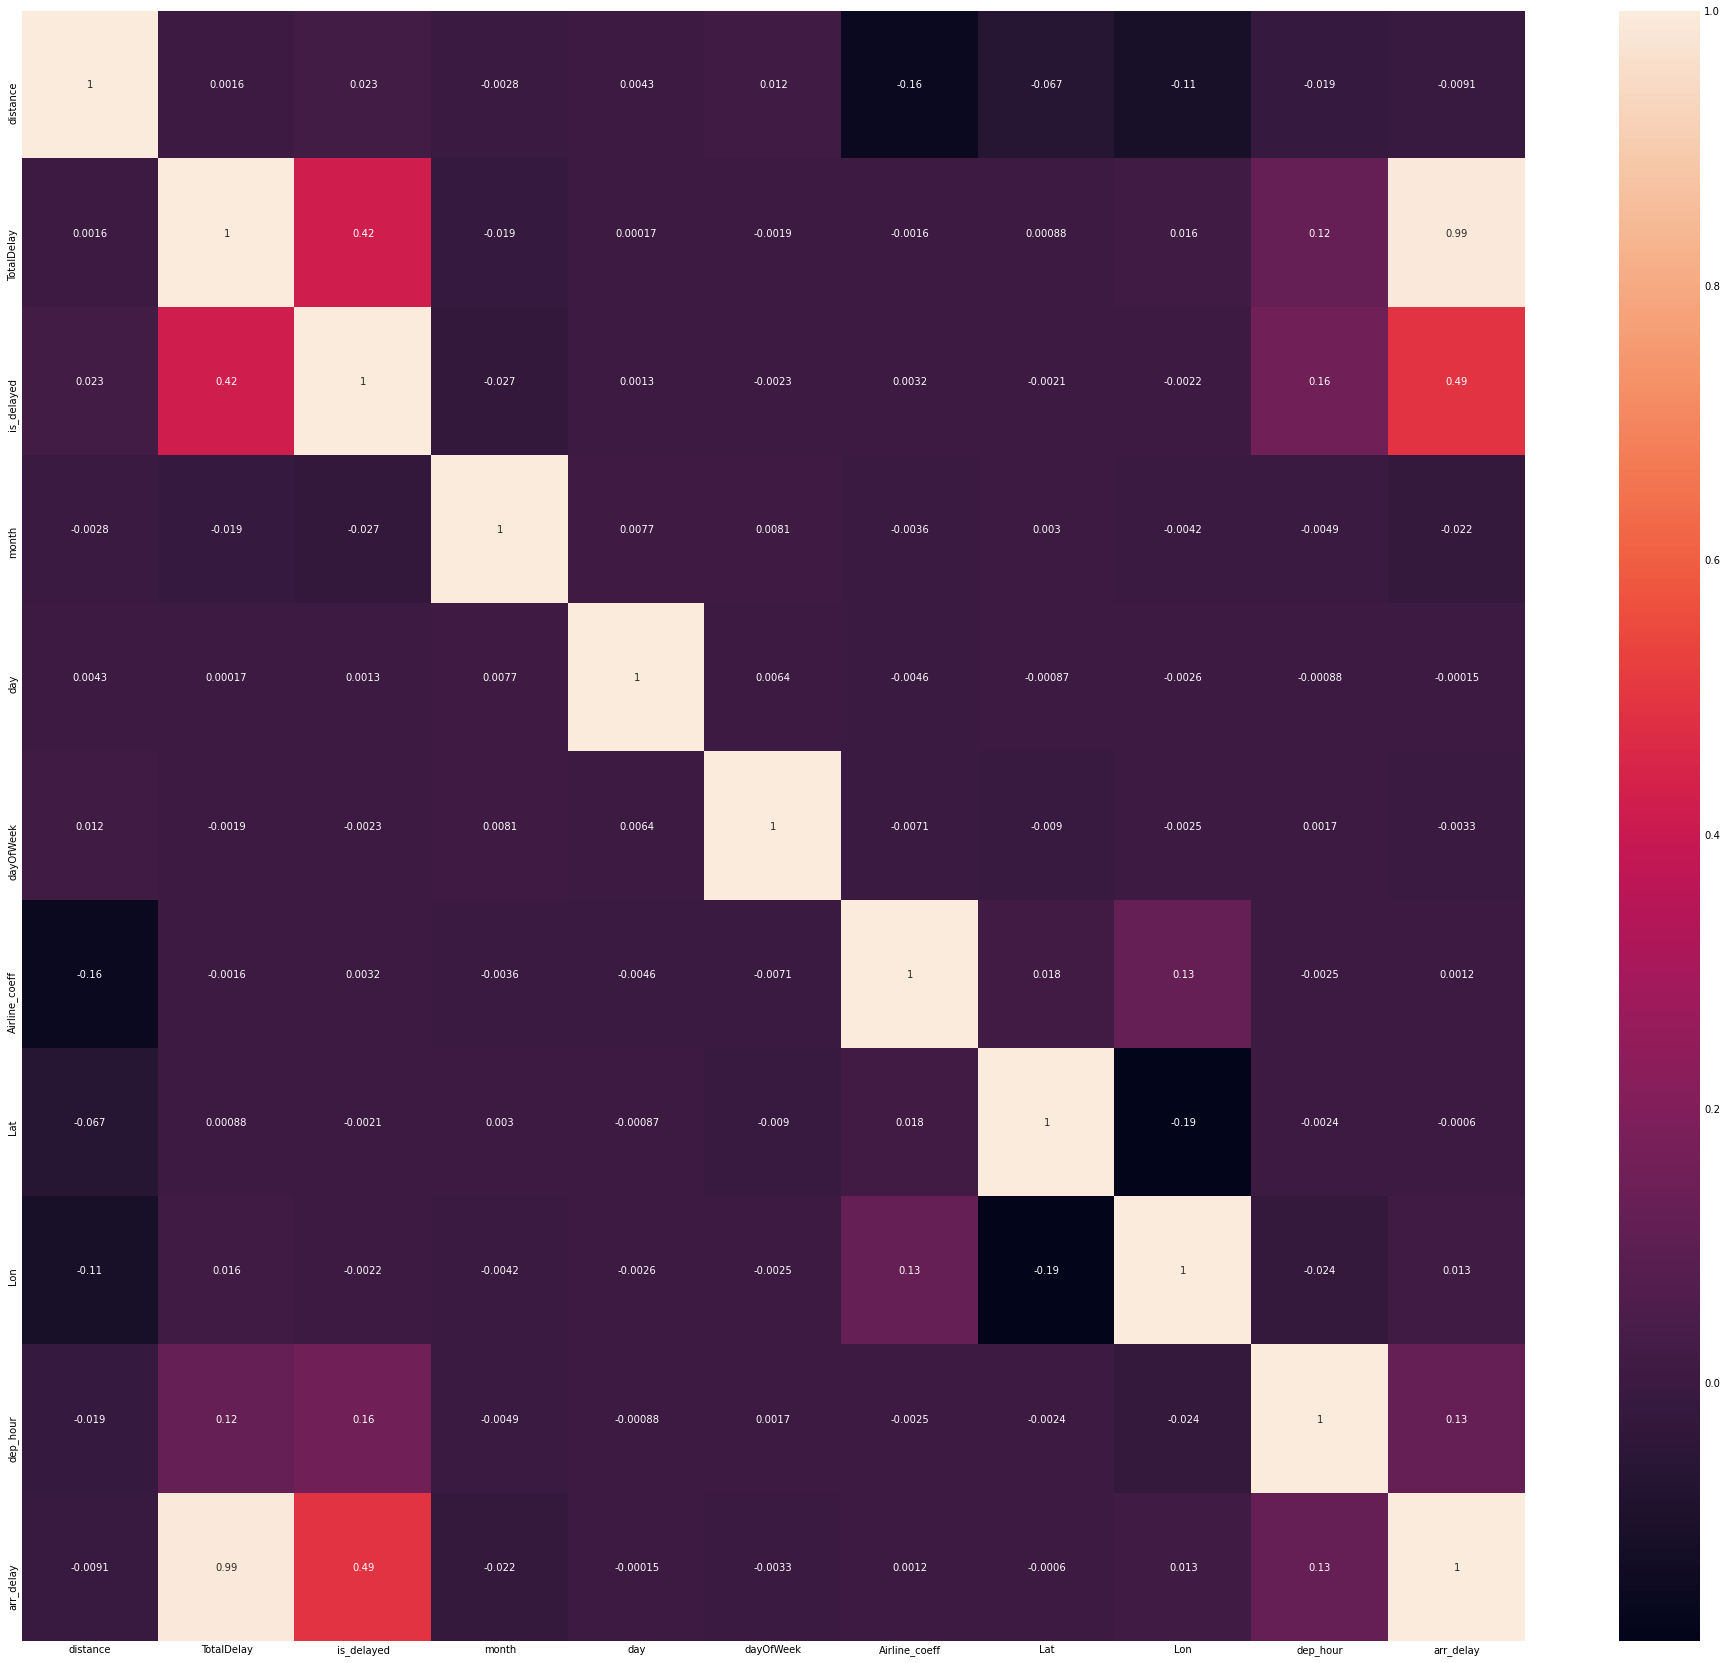

In [265]:
# Calculate Correlated features from sample
Corr = test_f.corr(method ='pearson')

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
sn.heatmap(Corr, annot=True)
plt.show()


,distance,TotalDelay,is_delayed,month,day,dayOfWeek,Airline_coeff,Lat,Lon,dep_hour,arr_delay
0,-0.742787,-0.375566,-0.756252,0.708734,-0.195325,1.033844,1.309653,0.200858,-1.039016,-0.599511,-0.531461
1,-1.038705,-0.335489,-0.756252,-0.172427,-1.336092,-0.971312,-0.128457,-0.012827,0.178069,-1.587943,-0.358951
2,-0.405817,-0.135104,1.322310,-0.172427,-1.222015,-0.470023,-0.290837,-0.188643,0.120385,0.191235,0.139410
3,-0.742787,0.526168,1.322310,0.708734,-0.537555,-0.470023,-1.820861,0.200858,-1.039016,0.981981,0.541933
4,-0.463974,1.895469,1.322310,-0.466147,0.375058,1.535133,1.309653,-0.261103,-0.265033,-0.204138,1.883675
...,...,...,...,...,...,...,...,...,...,...,...
488918,0.507594,-0.308771,-0.756252,-1.053588,-1.450169,1.535133,-0.290837,0.500620,0.433552,0.388922,-0.358951
488919,0.463121,-0.188540,1.322310,1.296174,-0.651632,1.535133,-0.290837,-0.545789,-0.212690,0.191235,-0.071435
488920,-0.084242,-0.368887,-0.756252,-1.053588,-0.537555,-1.472601,-1.820861,-0.337753,-0.689417,-0.994884,-0.416455
488921,-0.475948,-0.268694,-0.756252,-1.641029,-1.450169,0.031266,-0.128457,0.510493,-0.721201,-0.797197,-0.301448


LR-MAE for the Training set:  0.07967258503794708
LR-Score for the Training set:  0.9891272715962443


MAE for the test set:  0.079795109475878
LR-Score for the Test set:  1.0


RR-MAE for the Training set:  0.0796725731243736
RR-MAE for the Test set:  0.07979509827140148


Ridge Regression is better
